# 3802ICT Assignment 1

<p style="text-align:right">Junghee Yang (Kat) <br>
Regnier Avice<br>
Yunpeng Huang (Steven)</p>

## Project title:

## 1. A brief description of the problem/question
<p>Amsterdam is the capital city of Netherland with a population of 870,000 with 17 million tourists every year. Many tourists these days are staying at Airbnb hosted by homeowners. This dataset is from insiderairbnb.com which contains descriptions of Airbnb listings on 6th of December 2018 in Amsterdam. The dataset includes the name of the listing, number of reviews, locations, etc. </p>

<p>This projects are consist of these problems/questions:</p>
 

<ul>
    <li><b>Classification and label prediction - Can prices be predicted by the size of property and reviews?<b>
    <li><b>Association and Correlation - </b>
    <li><b>Characterization - <b>
</ul>



## 2. Dataset description
<p>The dataset contains Airbnb listings in Amsterdam on 6th December 2018 and it was retrieved from Kaggle which was downloaded from insideairbnb.com. It contains details of Airbnb listings such as prices, reviews, size of the place, etc. with 96 attributes with 20,030 data samples. </p>

## 3. Algorithm/techniques for different learning tasks
<ul>
    <li><b>Neural networks</b>: A neural network is a type of machine learning consisting of neurons, weights and biases. It allows them to be trained for classification including pattern recognition. </li>
    <li><b>Association and Correlation</b>: </li>
    <li><b>Characterization</b>:</li>
</ul>
    

## 4. Measurements to evaluate the results



In [18]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

# Read dataset
col_list = ['host_response_rate', 'host_is_superhost', 'host_identity_verified', 'zipcode', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'number_of_reviews', 'review_scores_rating']
df = pd.read_csv("/Users/katyang/Desktop/Uni/Year2-Trimester2/3804ICT/Assignment/listings_details.csv", usecols=col_list)


In [19]:
# host_response_rate - remove '%' and change object to int 
try: 
    df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
    df['host_response_rate'] = df['host_response_rate'].astype(int)
except:
    pass

In [20]:
# host_is_superhost - change object to BOOL
try: 
    df['host_is_superhost'] = df['host_is_superhost'].str.replace('f', 'FALSE')
    df['host_is_superhost'] = df['host_is_superhost'].str.replace('t', 'TRUE')
    df['host_is_superhost'] = df['host_is_superhost'].astype(bool)
except:
    pass

In [21]:
# host_identity_verified - change object to BOOL
try: 
    df['host_identity_verified'] = df['host_identity_verified'].str.replace('f', 'FALSE')
    df['host_identity_verified'] = df['host_identity_verified'].str.replace('t', 'TRUE')
    df['host_identity_verified'] = df['host_identity_verified'].astype(bool)
except:
    pass

In [22]:
# weekly_price, monthly_price, security_deposit, Price 
#                     - remove '$' and ',' and change string to float
try: 
    df['price'] = df['price'].str.replace(',', '')
    df['price'] = df['price'].str.replace('$', '')
    df['price'] = df['price'].astype(float)

    df['weekly_price'] = df['weekly_price'].str.replace(',', '')
    df['weekly_price'] = df['weekly_price'].str.replace('$', '')
    df['weekly_price'] = df['weekly_price'].astype(float)

    df['monthly_price'] = df['monthly_price'].str.replace(',', '')
    df['monthly_price'] = df['monthly_price'].str.replace('$', '')
    df['monthly_price'] = df['monthly_price'].astype(float)
    
    df['security_deposit'] = df['security_deposit'].str.replace(',', '')
    df['security_deposit'] = df['security_deposit'].str.replace('$', '')
    df['security_deposit'] = df['security_deposit'].astype(float)
    
except:
    pass

## 5. a) Data exploration

<ul>
    <li style="font-size:16px">Number of the data samples</li>
    <ul>
        <li style="list-style-type: square">Total number of samples: 20,030</li>
    </ul>
</ul>


In [25]:
df.count

<bound method DataFrame.count of       host_response_rate  host_is_superhost  host_identity_verified  zipcode  \
0                    100               True                    True      NaN   
1                    100               True                    True  1013 XE   
2                    100               True                    True     1017   
3                    100               True                    True     1016   
4                    100               True                    True     1013   
...                  ...                ...                     ...      ...   
20025                NaN               True                    True  1098 VV   
20026                NaN               True                    True     1094   
20027                NaN               True                    True  1093 GB   
20028                NaN               True                    True     1094   
20029                NaN               True                    True  1078 CL   

      

<br>
<br>
<ul>
    <ul>
        <li style="list-style-type: square">Total number of NULL</li>
    </ul>
</ul>


In [28]:
df.isnull().sum(axis = 0)

host_response_rate         9483
host_is_superhost             0
host_identity_verified        0
zipcode                     866
property_type                 0
room_type                     0
accommodates                  0
bathrooms                    10
bedrooms                      8
beds                          7
price                         0
weekly_price              17187
monthly_price             18469
security_deposit           6166
number_of_reviews             0
review_scores_rating       2639
dtype: int64

<br>
<br>
<ul>
    <li style="font-size:16px">Types of attributes</li>
</ul>

In [8]:
df.dtypes

host_response_rate         object
host_is_superhost            bool
host_identity_verified       bool
zipcode                    object
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                     float64
weekly_price              float64
monthly_price             float64
security_deposit          float64
number_of_reviews           int64
review_scores_rating      float64
dtype: object

<br>
<br>
<ul>
    <li style="font-size:16px">statistical information of each attribute - Five number summery</li>
</ul>

In [9]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,number_of_reviews,review_scores_rating
count,20030.000000,20020.000000,20022.00000,20023.000000,20030.000000,2843.000000,1561.000000,13864.000000,20030.000000,17391.000000
mean,2.891912,1.137662,1.44506,1.849223,152.181178,821.054872,2594.989110,221.875577,21.560459,94.849520
std,1.318760,0.793903,0.88568,1.389664,145.828976,458.844485,1527.438816,340.210814,43.240292,6.648685
min,1.000000,0.000000,0.00000,0.000000,0.000000,100.000000,550.000000,0.000000,0.000000,20.000000
25%,2.000000,1.000000,1.00000,1.000000,96.000000,550.000000,1650.000000,0.000000,3.000000,93.000000
50%,2.000000,1.000000,1.00000,1.000000,125.000000,700.000000,2200.000000,150.000000,8.000000,97.000000
75%,4.000000,1.000000,2.00000,2.000000,175.000000,950.000000,3000.000000,295.000000,22.000000,100.000000
max,17.000000,100.500000,12.00000,32.000000,8500.000000,6000.000000,20000.000000,4736.000000,695.000000,100.000000


### Outliers in price

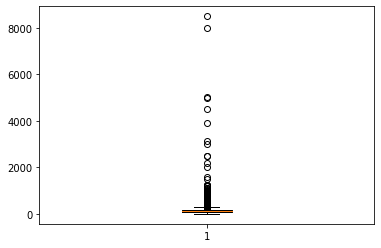

In [10]:
plt.boxplot(df['price'])
plt.show()

### Remove outliers in price

In [11]:
from scipy import stats

df['z_score'] = np.abs(stats.zscore(df['price']))
df = df[df.z_score < 3]

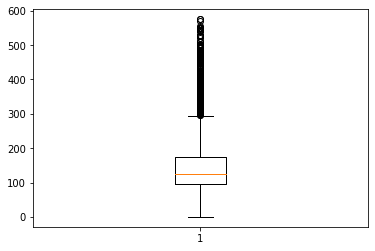

In [12]:
plt.boxplot(df['price'])
plt.show()

In [13]:
df = df['host_response_rate'],['host_is_superhost'],['host_identity_verified'],['zipcode'],['property_type'],['room_type'],['accommodates'],['bathrooms'],['bedrooms'],['beds'],['price'],['weekly_price'],['monthly_price'],['security_deposit'],['number_of_reviews'],['review_scores_rating']

In [14]:
df.head

AttributeError: 'tuple' object has no attribute 'head'